In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_previous_application.csv')

In [4]:
df.head(5)

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

# Column Description

In [6]:
description = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_columns_description.csv',encoding='latin',index_col=0)
description = description[description['Table'].str.contains('previous_application')].drop(columns = 'Table',axis = 1).set_index("Row")
description

,Description,Special
Row,,
SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
SK_ID_CURR,ID of loan in our sample,hashed
NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
AMT_ANNUITY,Annuity of previous application,NaN
AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN


# 1st Cleaning

In [7]:
# Check null
df.isnull().sum(axis = 0)

SK_ID_PREV                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     307218
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                749540
AMT_GOODS_PRICE                 319525
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               749540
RATE_INTEREST_PRIMARY          1408910
RATE_INTEREST_PRIVILEGED       1408910
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 694672
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA         

In [8]:
# Remove all cols that have %null >= 90%
## find all cols
cols_found = df.loc[:,(df.isnull().sum(axis = 0) / df.shape[0]) >= 0.9].columns
cols_found
## In here I find that 2 tables have %null >= 90% which are ['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'] 
## -> we can remove this from the table
new_df = df.drop(columns=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'],axis= 1)


In [9]:
##Check valid values in each col
### Split df into 2 small ones, numerical and categorical 
numerical_data = new_df._get_numeric_data()
categorical_data = new_df.drop(columns=numerical_data.columns)

#### Numerical data

In [10]:
## Because all is numerical_data so i will check all the available values
for i in numerical_data.columns:
    great0 = numerical_data[i][numerical_data[i] > 0].count()
    equal0 =  numerical_data[i][numerical_data[i] == 0].count()
    smal0 =numerical_data[i][numerical_data[i] < 0].count()
    nan_total = numerical_data[i].isnull().sum()
    other_value = numerical_data.shape[0] - great0 - smal0 - nan_total - equal0
    print(f'{i}  has     >0 {great0},  =0 {equal0}  ,   <0 {smal0},    nan: {nan_total},   other values: {other_value}')


SK_ID_PREV  has     >0 1413701,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_ANNUITY  has     >0 1105243,  =0 1240  ,   <0 0,    nan: 307218,   other values: 0
AMT_APPLICATION  has     >0 1088399,  =0 325302  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT  has     >0 1137123,  =0 276577  ,   <0 0,    nan: 1,   other values: 0
AMT_DOWN_PAYMENT  has     >0 350184,  =0 313975  ,   <0 2,    nan: 749540,   other values: 0
AMT_GOODS_PRICE  has     >0 1088416,  =0 5760  ,   <0 0,    nan: 319525,   other values: 0
HOUR_APPR_PROCESS_START  has     >0 1413609,  =0 92  ,   <0 0,    nan: 0,   other values: 0
NFLAG_LAST_APPL_IN_DAY  has     >0 1408657,  =0 5044  ,   <0 0,    nan: 0,   other values: 0
RATE_DOWN_PAYMENT  has     >0 350184,  =0 313975  ,   <0 2,    nan: 749540,   other values: 0
DAYS_DECISION  has     >0 0,  =0 0  ,   <0 1413701,    nan: 0,   other values: 0
SELLERPLACE_AREA  has     >0 726438,  =0 50680  ,   <0 636583,    nan: 0,   other values: 0
CNT_PAYMENT  has     >0 9845

##### Explain for the validation of each column values

#### Categorical Data

In [11]:
for i in categorical_data.columns[:8]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_CONTRACT_TYPE : ['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA']

col WEEKDAY_APPR_PROCESS_START : ['SATURDAY', 'SUNDAY', 'THURSDAY', 'WEDNESDAY', 'TUESDAY', 'FRIDAY', 'MONDAY']

col FLAG_LAST_APPL_PER_CONTRACT : ['Y', 'N']

col NAME_CASH_LOAN_PURPOSE : ['XAP', 'XNA', 'Other', 'Buying a holiday home / land', 'Repairs', 'Everyday expenses', 'Payments on other loans', 'Urgent needs', 'Refusal to name the goal', 'Journey', 'Furniture', 'Buying a garage', 'Building a house or an annex', 'Education', 'Wedding / gift / holiday', 'Buying a home', 'Medicine', 'Purchase of electronic equipment', 'Buying a used car', 'Buying a new car', 'Car repairs', 'Business development', 'Hobby', 'Gasification / water supply', 'Money for a third person']

col NAME_CONTRACT_STATUS : ['Approved', 'Refused', 'Canceled', 'Unused offer']

col NAME_PAYMENT_TYPE : ['Cash through the bank', 'XNA', 'Cashless from the account of the employer', 'Non-cash from your account']

col CODE_REJECT_REASON : 

In [12]:
for i in categorical_data.columns[8:]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_CLIENT_TYPE : ['Repeater', 'New', 'Refreshed', 'XNA']

col NAME_GOODS_CATEGORY : ['Mobile', 'Clothing and Accessories', 'Furniture', 'XNA', 'Audio/Video', 'Consumer Electronics', 'Computers', 'Photo / Cinema Equipment', 'Sport and Leisure', 'Auto Accessories', 'Construction Materials', 'Medicine', 'Homewares', 'Medical Supplies', 'Gardening', 'Jewelry', 'Office Appliances', 'Other', 'Tourism', 'Vehicles', 'Direct Sales', 'Weapon', 'Fitness', 'Education', 'Insurance', 'Additional Service', 'Animals']

col NAME_PORTFOLIO : ['POS', 'Cash', 'Cards', 'XNA', 'Cars']

col NAME_PRODUCT_TYPE : ['XNA', 'x-sell', 'walk-in']

col CHANNEL_TYPE : ['Country-wide', 'Regional / Local', 'Stone', 'Contact center', 'AP+ (Cash loan)', 'Credit and cash offices', 'Channel of corporate sales', 'Car dealer']

col NAME_SELLER_INDUSTRY : ['Connectivity', 'Furniture', 'XNA', 'Consumer electronics', 'Industry', 'Clothing', 'Construction', 'Auto technology', 'Jewelry', 'Tourism', 'MLM partners']

col NAME_

##### Explain for the validation of each columns values

# EDA Process

###                 Internal

### Univariate Analysis


##### Categorical data

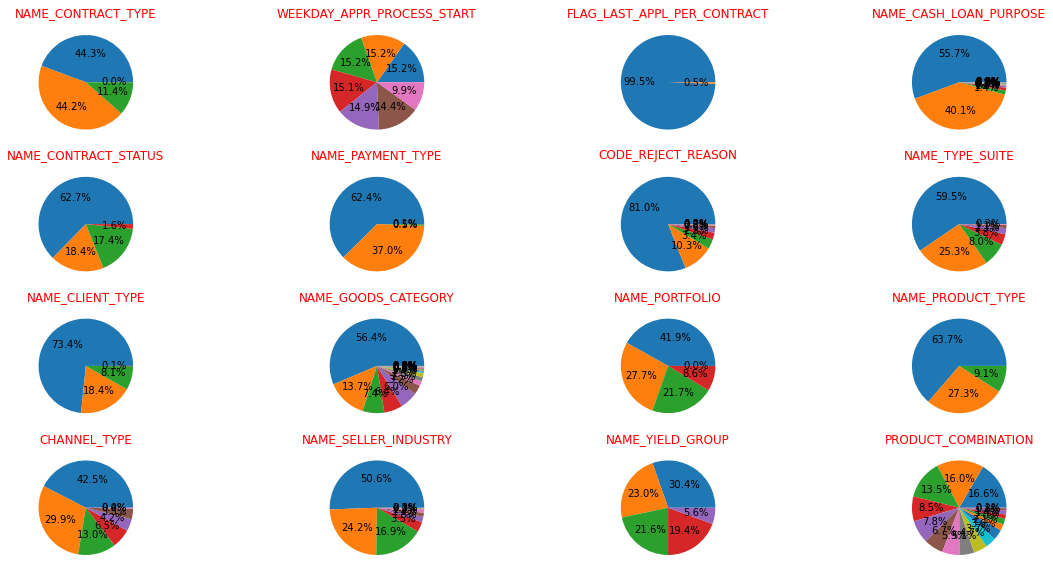

In [13]:
col= categorical_data.columns
fig, ax = plt.subplots(4,4,figsize=(20,10))
ite = 0 
for i in range(0,4):
    for j in range(0,4):
        sizes = categorical_data[col[ite]].value_counts(normalize=True)
        ax[i][j].pie(sizes, autopct='%1.1f%%')
        ax[i][j].set_title(col[ite], color = 'red')
        ite +=1
# Show the figure
plt.show()

##### From above pie chart I see that 1 columns that have an almost differences in percent of each categories, which name  is FLAG_LAST_APPL_PER_CONTRACT -> This feature does not affect a lot to our model -> This feature can be removed


In [14]:
new_df = new_df.drop(columns='FLAG_LAST_APPL_PER_CONTRACT', axis = 1)

### Multivariate Analysis

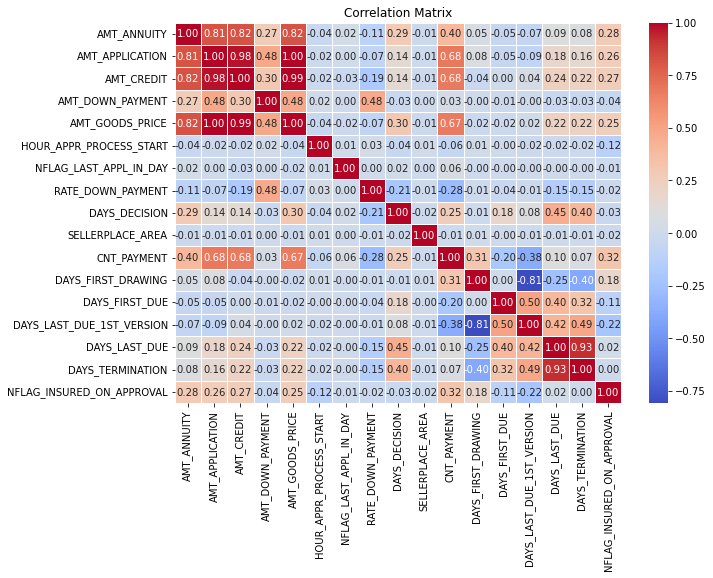

In [15]:
selected_columns = [col for col in new_df.columns if col not in ['SK_ID_PREV', 'SK_ID_CURR']]
correlation_matrix = new_df[selected_columns].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Note 
* From this table, We can gain an insight that 4 feature have high relationships, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT,AMT_GOODS_PRICE. 
* Also, this trend can be seen in between DAY_LAST_DUE_1ST_VERSION and DAYS_FIRST_DRAWING, DAYS_TERMINATION and DAY_LAST_DUE


-> "DAYS_TERMINATION", "DAYS_LAST_DUE_1ST_VERSION",  "AMT_APPLICATION" and "AMT_GOODS_PRICE" can be removed to prevent collinearity

In [16]:
new_df = new_df.drop(columns=["DAYS_TERMINATION", "DAYS_LAST_DUE_1ST_VERSION", "AMT_APPLICATION" ,"AMT_GOODS_PRICE"], axis = 1)


External (means that what is the correlation between with the target value)


In [17]:
app_train = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [18]:
merge_table = pd.merge(new_df.drop(columns='SK_ID_PREV'),app_train,on='SK_ID_CURR',how='left')
merge_table.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR,TARGET
0,Consumer loans,1730.430,17145.0,0.0,SATURDAY,15,1,0.000000,XAP,Approved,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,-42.0,0.0,293189,NaN
1,Consumer loans,68258.655,1754721.0,180000.0,SATURDAY,18,1,0.101325,XAP,Refused,...,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,293189,NaN
2,Consumer loans,12417.390,119848.5,0.0,SUNDAY,14,1,0.000000,XAP,Approved,...,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-392.0,0.0,293189,NaN
3,Cash loans,25188.615,679671.0,NaN,THURSDAY,11,1,NaN,XNA,Approved,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,365243.0,1.0,91587,0.0
4,Cash loans,21709.125,512370.0,NaN,WEDNESDAY,9,1,NaN,XNA,Approved,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,-155.0,1.0,91587,0.0


### Numerical Columns

In [19]:
numerical_data_col = merge_table._get_numeric_data().columns
columns_to_remove = ['SK_ID_CURR', 'NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY']
numerical_data_col = [col for col in numerical_data_col if col not in columns_to_remove]
numerical_data = merge_table[numerical_data_col]
numerical_data

,AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT,HOUR_APPR_PROCESS_START,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,TARGET
0,1730.430,17145.0,0.0,15,0.000000,-73,35,12.0,365243.0,-42.0,-42.0,NaN
1,68258.655,1754721.0,180000.0,18,0.101325,-472,55,36.0,NaN,NaN,NaN,NaN
2,12417.390,119848.5,0.0,14,0.000000,-548,196,12.0,365243.0,-512.0,-392.0,NaN
3,25188.615,679671.0,NaN,11,NaN,-164,-1,36.0,365243.0,-134.0,365243.0,0.0
4,21709.125,512370.0,NaN,9,NaN,-515,6,36.0,365243.0,-485.0,-155.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,6030.675,133866.0,0.0,15,0.000000,-832,200,24.0,365243.0,-801.0,-531.0,0.0
1413697,13726.080,123525.0,13725.0,14,0.108909,-495,154,10.0,365243.0,-464.0,-194.0,0.0
1413698,4716.495,46800.0,0.0,9,0.000000,-160,50,12.0,365243.0,-119.0,365243.0,0.0
1413699,10301.940,112491.0,0.0,12,0.000000,-560,140,12.0,365243.0,-529.0,-199.0,0.0


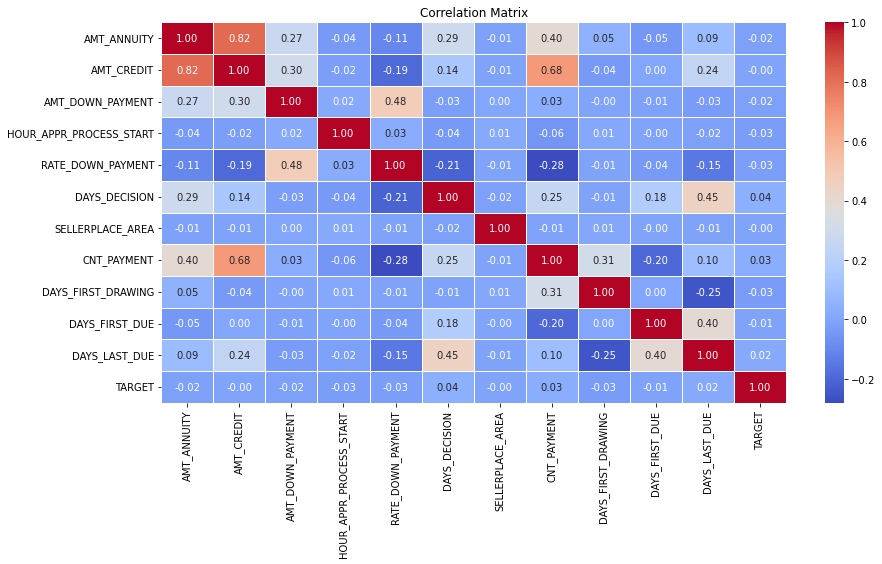

In [20]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
# AMT_ANNUITY, AMT_CREDIT and AMT_DOWN_PAYMENT
split_one = merge_table[['AMT_ANNUITY','AMT_CREDIT','AMT_DOWN_PAYMENT','TARGET']]

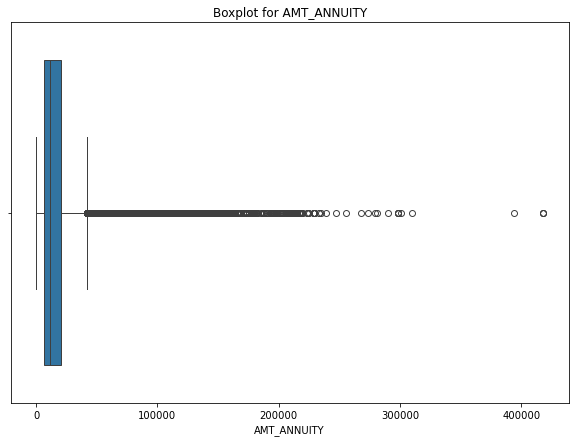

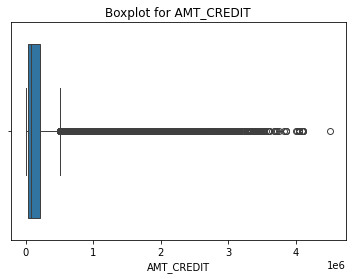

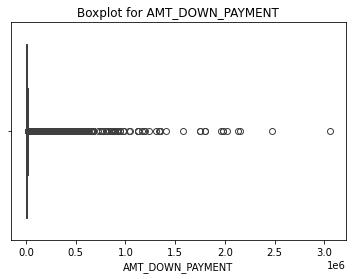

In [22]:
## Check outliters
plt.figure(figsize=(10, 7))

for column in split_one.columns[:-1]:
    # Create a boxplot for the column
    sns.boxplot(x=split_one[column])
    # Set the title of the plot
    plt.title(f'Boxplot for {column}')
    # Show the plot
    plt.show()

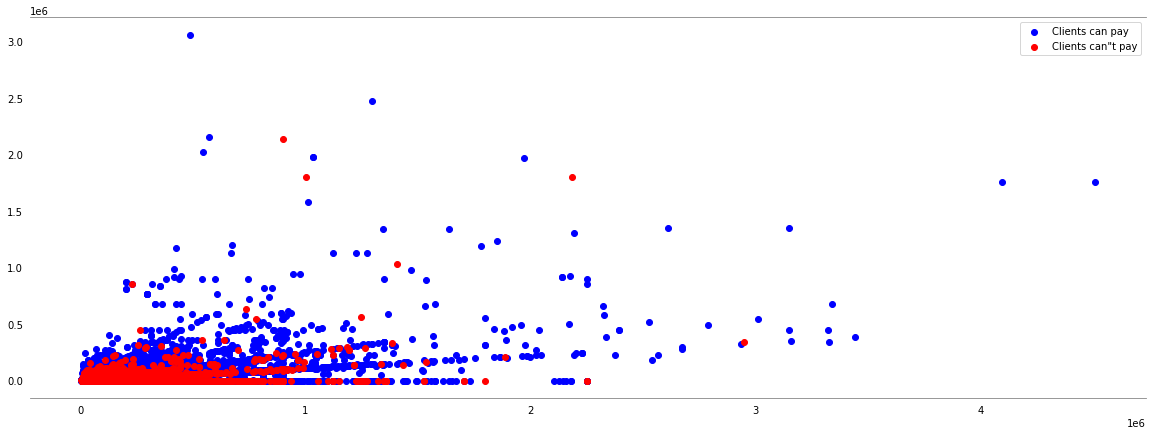

In [23]:
# Does the amount of total credit money and the amt_down_payment  reflect sth
fig,ax = plt.subplots(figsize  = (20,7))

# ax2 and ax3
ax.scatter(split_one[split_one['TARGET']==0]['AMT_CREDIT'],split_one[split_one['TARGET']==0]['AMT_DOWN_PAYMENT']\
           , color = 'blue',label = 'Clients can pay ')
ax.scatter(split_one[split_one['TARGET']==1]['AMT_CREDIT'],split_one[split_one['TARGET']==1]['AMT_DOWN_PAYMENT']\
           ,color = 'red',label = 'Clients can"t pay')

ax.tick_params(left = False,bottom = False)
ax.spines[['left','right']].set_visible(False)
ax.spines[['bottom','top']].set_color('grey')
ax.legend()

* When the amount of loan money and down payment money increase, the probability of clients can pay the loan rise too. 

In [24]:
# Information related to time
split1 = merge_table[['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE','CNT_PAYMENT','TARGET']]
split1

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,CNT_PAYMENT,TARGET
0,-73,365243.0,-42.0,-42.0,12.0,NaN
1,-472,NaN,NaN,NaN,36.0,NaN
2,-548,365243.0,-512.0,-392.0,12.0,NaN
3,-164,365243.0,-134.0,365243.0,36.0,0.0
4,-515,365243.0,-485.0,-155.0,36.0,0.0
...,...,...,...,...,...,...
1413696,-832,365243.0,-801.0,-531.0,24.0,0.0
1413697,-495,365243.0,-464.0,-194.0,10.0,0.0
1413698,-160,365243.0,-119.0,365243.0,12.0,0.0
1413699,-560,365243.0,-529.0,-199.0,12.0,0.0


* we can see here is that there exist the extreme  outliers here '365243' in every col -> let's try to fill na by this value

In [25]:
split1.iloc[:,:4] = split1.iloc[:,:4].fillna(365243)
split1.iloc[:,4] = split1.iloc[:,4].fillna(0)

In [26]:
#Because all of this features are calculated in days, so we will convert it into years
split1.iloc[:,:4] = split1.iloc[:,:4].apply(lambda x: round((x*(-1))/365))
split1.iloc[:,4] = split1.iloc[:,4].apply(lambda x: round(x/12))
split1 = split1.rename(columns={
    'DAYS_DECISION' :'YEARS_DECISION' ,
    'DAYS_FIRST_DRAWING':'YEARS_FIRST_DRAWING',
    'DAYS_FIRST_DUE':'YEARS_FIRST_DUE',
    'DAYS_LAST_DUE':'YEARS_LAST_DUE',
    'CNT_PAYMENT':'CNT_PAYMENT(YEARS)'
})
split1

,YEARS_DECISION,YEARS_FIRST_DRAWING,YEARS_FIRST_DUE,YEARS_LAST_DUE,CNT_PAYMENT(YEARS),TARGET
0,0.0,-1001.0,0.0,0.0,1,NaN
1,1.0,-1001.0,-1001.0,-1001.0,3,NaN
2,2.0,-1001.0,1.0,1.0,1,NaN
3,0.0,-1001.0,0.0,-1001.0,3,0.0
4,1.0,-1001.0,1.0,0.0,3,0.0
...,...,...,...,...,...,...
1413696,2.0,-1001.0,2.0,1.0,2,0.0
1413697,1.0,-1001.0,1.0,1.0,1,0.0
1413698,0.0,-1001.0,0.0,-1001.0,1,0.0
1413699,2.0,-1001.0,1.0,1.0,1,0.0


+ See from the dataframe, the value <0 or too high is outliers, check percent of outliers

In [27]:
for i in split1.columns[:-1]:
    print(f'{i} - {(split1[i] < 0).sum() / split1.shape[0] * 100} %')

YEARS_DECISION - 0.0 %
YEARS_FIRST_DRAWING - 96.21553638287021 %
YEARS_FIRST_DUE - 42.0929178093529 %
YEARS_LAST_DUE - 52.479131018510984 %
CNT_PAYMENT(YEARS) - 0.0 %


* Remove Year_First_Drawing because high outliers

In [28]:
split1 = split1.drop(columns='YEARS_FIRST_DRAWING')

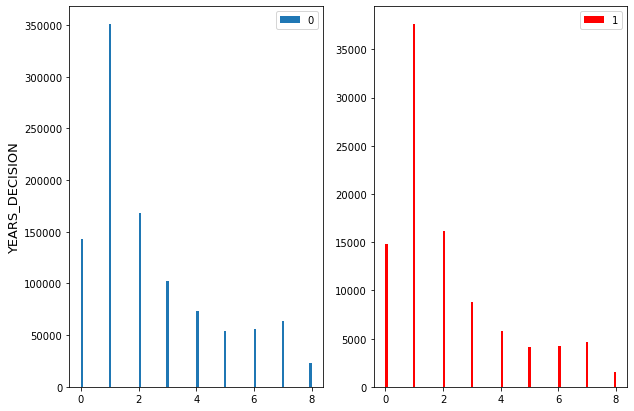

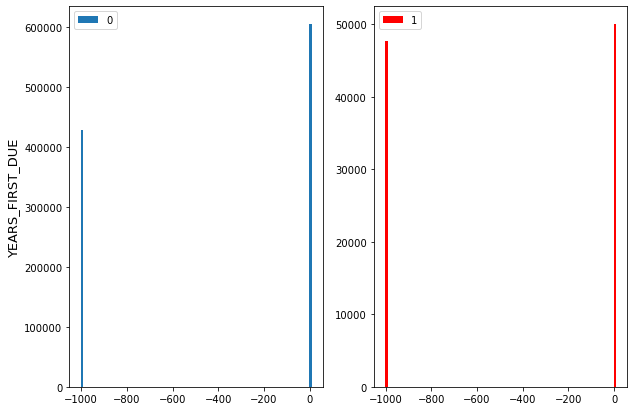

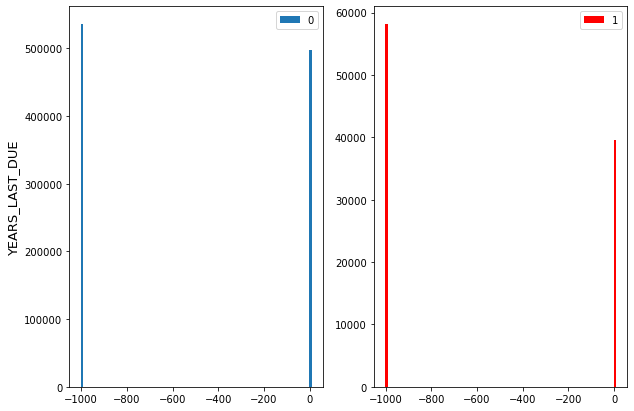

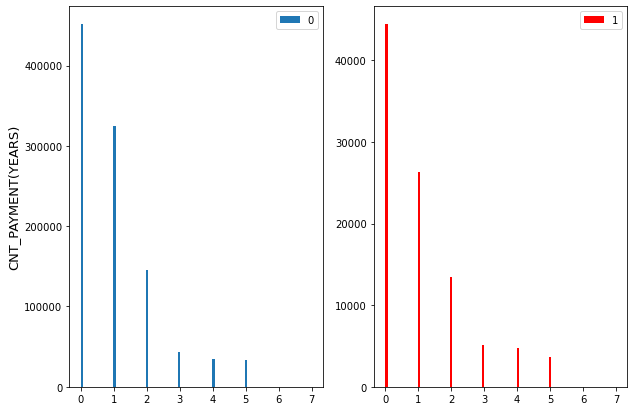

In [29]:
for i in split1.columns[:-1]:
    fig,ax = plt.subplots(1,2,figsize =(10,7))
    # for col in numerical_data.columns:
    class0 = split1[split1 ['TARGET']==0][i]
    class1 = split1[split1 ['TARGET']==1][i]
    ax[0].hist(class0,bins = 100,label = 0)
    ax[1].hist(class1,bins = 100,color = 'red',label= 1)
    ax[0].legend()
    ax[0].set_ylabel(f'{i}',size = 13)
    ax[1].legend()

* These Features seems no impact to Target value -> can be removed

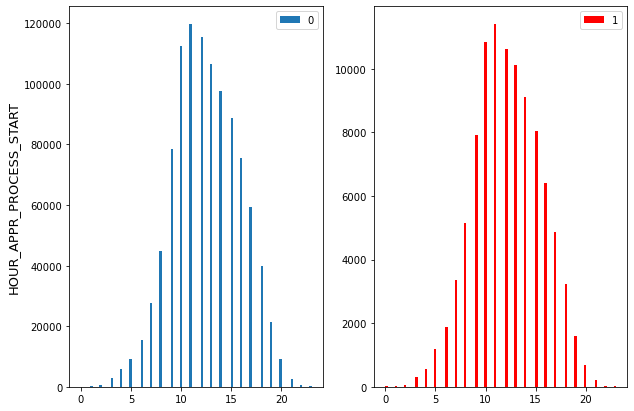

In [30]:
# 2 last columns 
split1 = merge_table[['HOUR_APPR_PROCESS_START','TARGET']]
for i in split1.columns[:-1]:
    fig,ax = plt.subplots(1,2,figsize =(10,7))
    # for col in numerical_data.columns:
    class0 = split1[split1 ['TARGET']==0][i]
    class1 = split1[split1 ['TARGET']==1][i]
    ax[0].hist(class0,bins = 100,label = 0)
    ax[1].hist(class1,bins = 100,color = 'red',label= 1)
    ax[0].legend()
    ax[0].set_ylabel(f'{i}',size = 13)
    ax[1].legend()

+ This features distribution are not different with each other -> can be removed

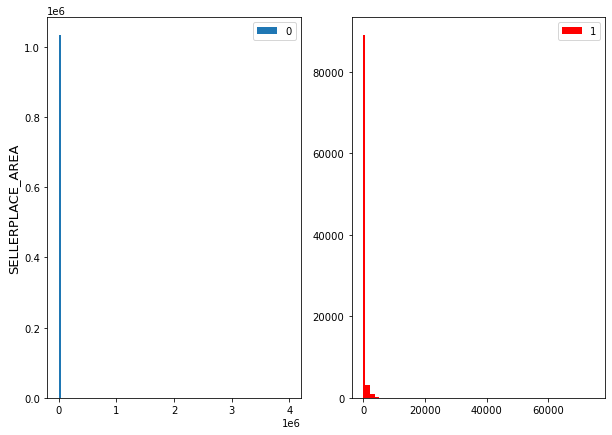

In [31]:
split1 = merge_table[['SELLERPLACE_AREA','TARGET']]
for i in split1.columns[:-1]:
    fig,ax = plt.subplots(1,2,figsize =(10,7))
    # for col in numerical_data.columns:
    class0 = split1[split1 ['TARGET']==0][i]
    class1 = split1[split1 ['TARGET']==1][i]
    ax[0].hist(class0,bins = 100,label = 0)
    ax[1].hist(class1,bins = 100,color = 'red',label= 1)
    ax[0].legend()
    ax[0].set_ylabel(f'{i}',size = 13)
    ax[1].legend()

+ This features can be removed.

### Categorical column

In [32]:
cat_data = merge_table.drop(columns = numerical_data_col,axis = 1)
cat_data['TARGET'] = merge_table['TARGET']
cat_data = cat_data.drop(columns='SK_ID_CURR',axis = 1)
cat_data

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,Consumer loans,SATURDAY,1,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest,0.0,NaN
1,Consumer loans,SATURDAY,1,XAP,Refused,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,Furniture,low_normal,POS industry with interest,NaN,NaN
2,Consumer loans,SUNDAY,1,XAP,Approved,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest,0.0,NaN
3,Cash loans,THURSDAY,1,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low,1.0,0.0
4,Cash loans,WEDNESDAY,1,XNA,Approved,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,Consumer loans,SATURDAY,1,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Regional / Local,Consumer electronics,low_action,POS household without interest,0.0,0.0
1413697,Consumer loans,SATURDAY,1,XAP,Approved,Cash through the bank,XAP,NaN,New,Audio/Video,POS,XNA,Stone,Consumer electronics,low_normal,POS household with interest,0.0,0.0
1413698,Consumer loans,FRIDAY,1,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Construction Materials,POS,XNA,Regional / Local,Construction,middle,POS industry with interest,0.0,0.0
1413699,Consumer loans,FRIDAY,1,XAP,Approved,Cash through the bank,XAP,NaN,New,Consumer Electronics,POS,XNA,Regional / Local,Consumer electronics,low_action,POS household without interest,0.0,0.0


In [33]:
cat_data.columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'TARGET'],
      dtype='object')

In [34]:
# NAME_CONTRACT_TYPE, NAME_CONTRACT_STATUS, NAME_CASH_LOAN_PURPOSE ,NAME_CLIENT_TYPE
split = cat_data[['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS','TARGET']]
split

,NAME_CONTRACT_TYPE,NAME_CLIENT_TYPE,NAME_CONTRACT_STATUS,TARGET
0,Consumer loans,Repeater,Approved,NaN
1,Consumer loans,Repeater,Refused,NaN
2,Consumer loans,New,Approved,NaN
3,Cash loans,Repeater,Approved,0.0
4,Cash loans,Repeater,Approved,0.0
...,...,...,...,...
1413696,Consumer loans,New,Approved,0.0
1413697,Consumer loans,New,Approved,0.0
1413698,Consumer loans,New,Approved,0.0
1413699,Consumer loans,New,Approved,0.0


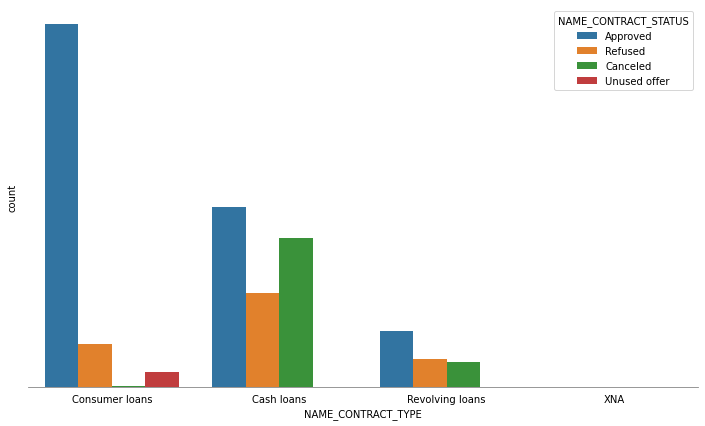

In [35]:
fig,ax = plt.subplots(figsize = (12,7))

sns.countplot(data = split, x = 'NAME_CONTRACT_TYPE', hue = 'NAME_CONTRACT_STATUS',dodge=True,ax = ax)
ax.spines[['left','right','top']].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.set_yticklabels([])
ax.tick_params(left = False, bottom = False)

+ Almost the Clients take a consumer loans and this contract type is the highest category which has very low refuse application.While Cash loan is lower and more risker to be canceled. 

Text(0.5, 1.0, 'Target= 1')

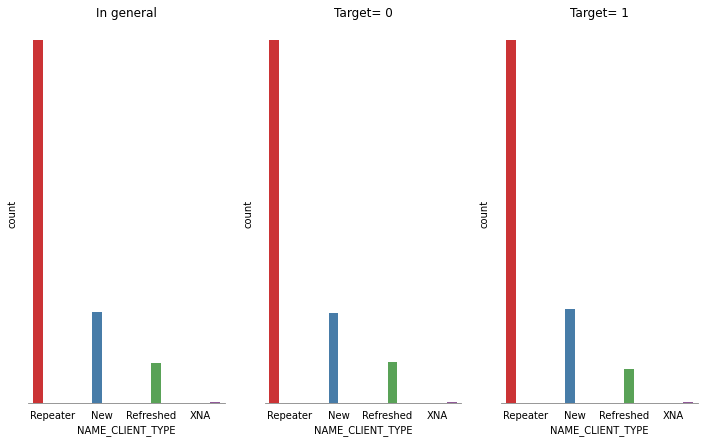

In [36]:
fig,ax = plt.subplots(1,3,figsize = (12,7))

sns.countplot(data = split, x = 'NAME_CLIENT_TYPE',dodge=True,ax = ax[0], palette='Set1')
ax[0].spines[['left','right','top']].set_visible(False)
ax[0].spines['bottom'].set_color('grey')
ax[0].set_yticklabels([])
ax[0].tick_params(left = False, bottom = False)
ax[0].set_title('In general')

sns.countplot(data = split[split['TARGET'] == 0], x = 'NAME_CLIENT_TYPE',dodge=True,ax = ax[1], palette='Set1')
ax[1].spines[['left','right','top']].set_visible(False)
ax[1].spines['bottom'].set_color('grey')
ax[1].set_yticklabels([])
ax[1].tick_params(left = False, bottom = False)
ax[1].set_title('Target= 0')
sns.countplot(data = split[split['TARGET'] == 1], x = 'NAME_CLIENT_TYPE',dodge=True,ax = ax[2], palette='Set1')
ax[2].spines[['left','right','top']].set_visible(False)
ax[2].spines['bottom'].set_color('grey')
ax[2].set_yticklabels([])
ax[2].tick_params(left = False, bottom = False)
ax[2].set_title('Target= 1')

+ Phần lớn các  khoản vay đều đã là những người đã từng vay (Repeater)
+ But, the features doesn't help to classify clearly about Target value-> can be removed

In [37]:
# NAME_PAYMENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE, NAME_SELLER_INDUSTRY, NAME_YIELD_GROUP, PRODUCT_COMBINATION
split = merge_table[['NAME_PAYMENT_TYPE','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY'
                     , 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION','TARGET']]

split

,NAME_PAYMENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET
0,Cash through the bank,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest,NaN
1,Cash through the bank,POS,XNA,Regional / Local,Furniture,low_normal,POS industry with interest,NaN
2,Cash through the bank,POS,XNA,Stone,Furniture,middle,POS industry with interest,NaN
3,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low,0.0
4,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,0.0
...,...,...,...,...,...,...,...,...
1413696,Cash through the bank,POS,XNA,Regional / Local,Consumer electronics,low_action,POS household without interest,0.0
1413697,Cash through the bank,POS,XNA,Stone,Consumer electronics,low_normal,POS household with interest,0.0
1413698,Cash through the bank,POS,XNA,Regional / Local,Construction,middle,POS industry with interest,0.0
1413699,Cash through the bank,POS,XNA,Regional / Local,Consumer electronics,low_action,POS household without interest,0.0


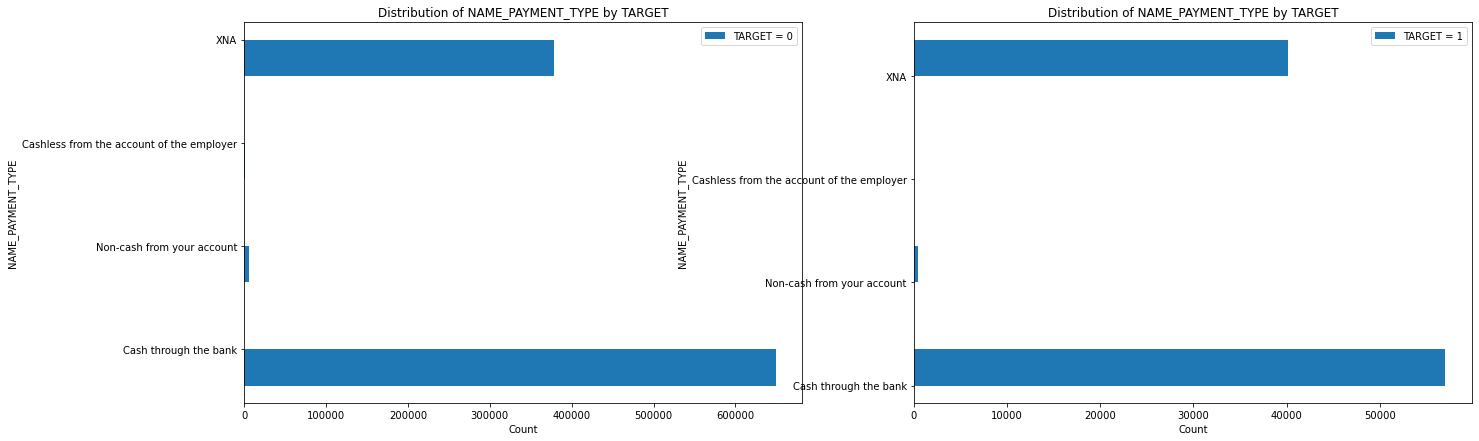

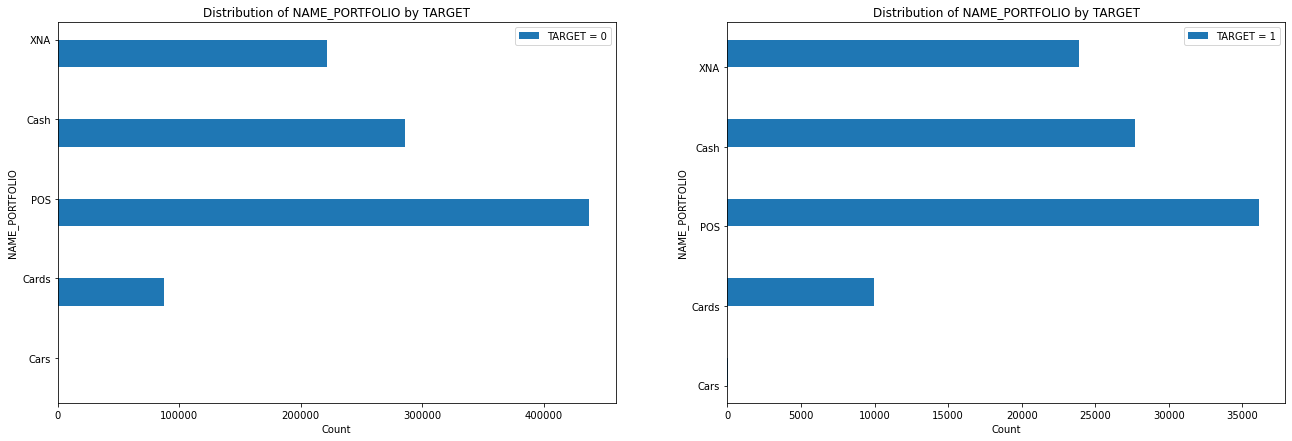

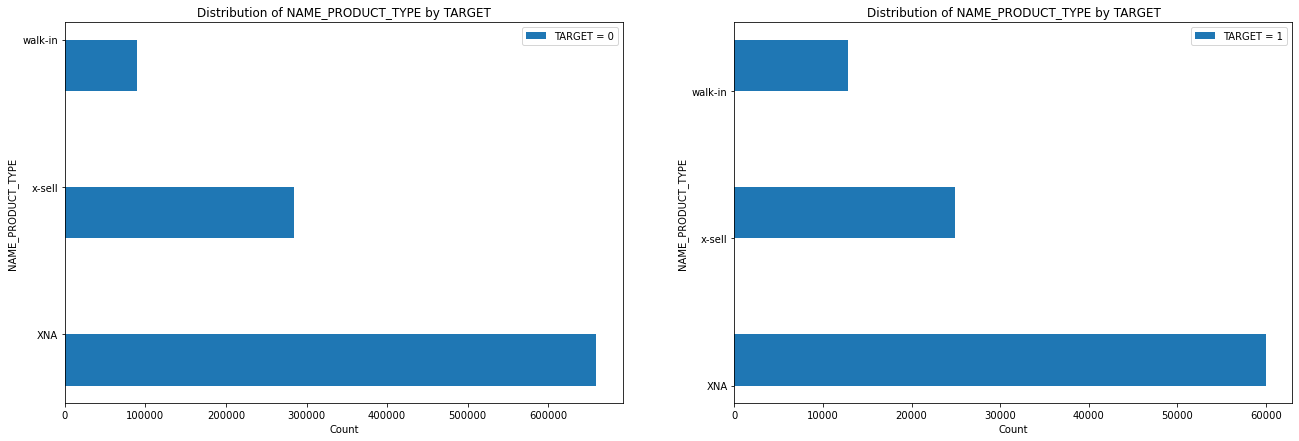

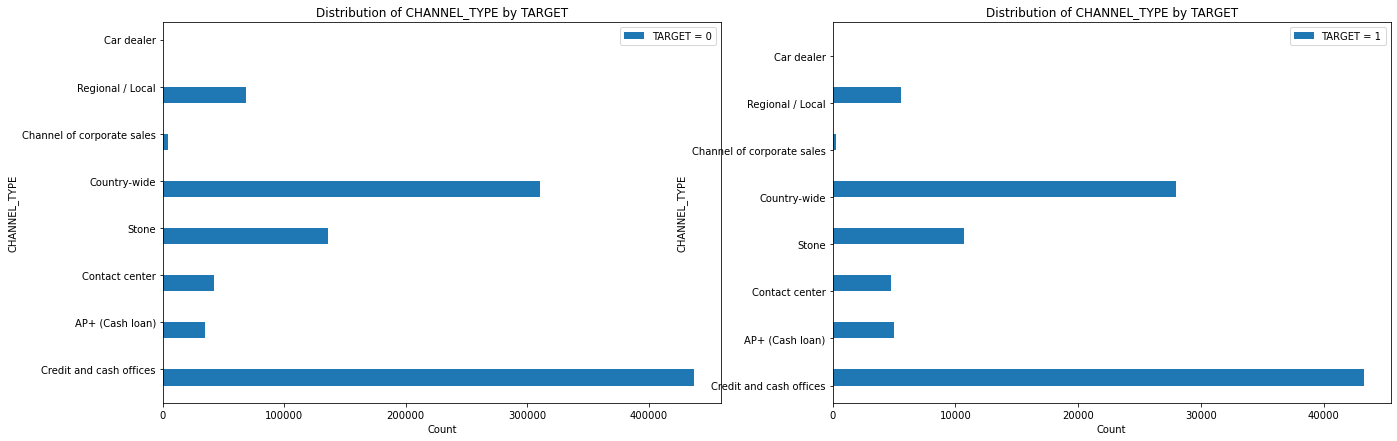

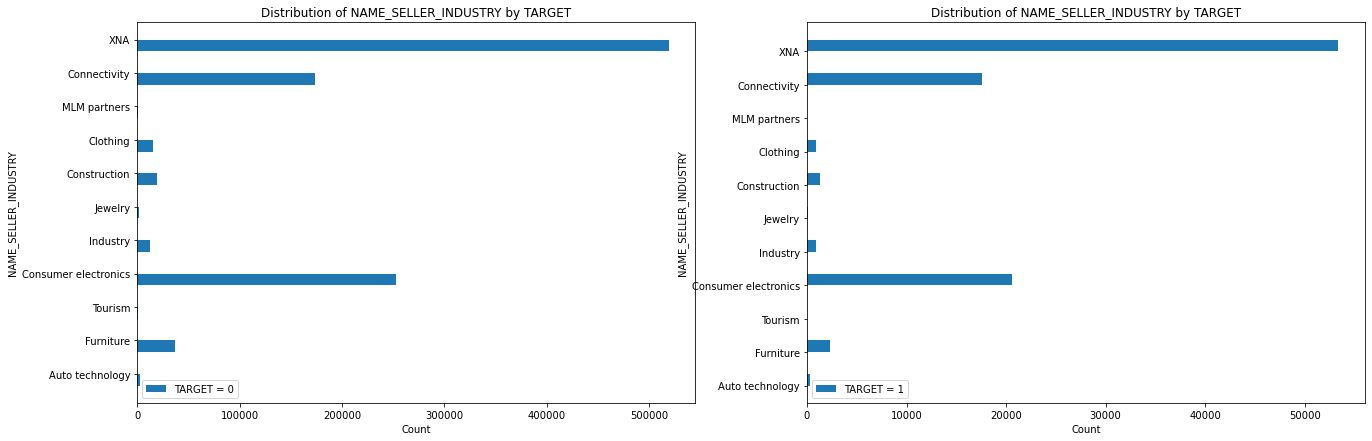

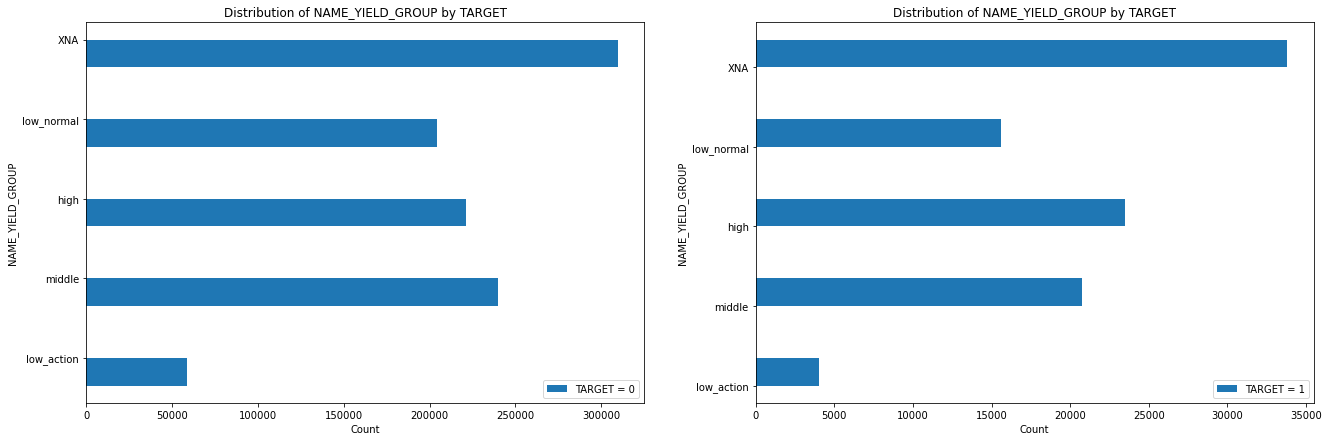

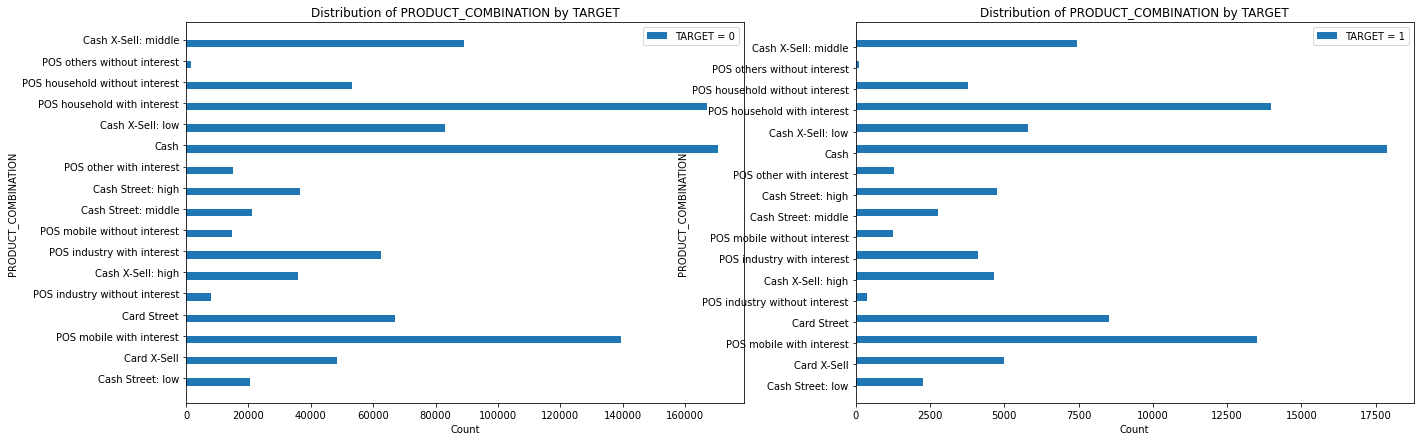

In [38]:
for col in split.columns[:-1]:
    fig,ax = plt.subplots(1,2 ,figsize = (22,7))
   
    t_0 = split[split['TARGET'] == 0][col].value_counts()
    t_1 = split[split['TARGET'] == 1][col].value_counts()

    all_t = set(t_0.index) | set(t_1.index)
    index_mapping = {t: i for i, t in enumerate(all_t)}
    width = 0.35
    # Plot the unstacked bar chart
    x_0 = np.array([index_mapping[t] for t in t_0.index])
    x_1 = np.array([index_mapping[t] for t in t_1.index])

    ax[0].barh(x_0 - width/2, t_0, height=width, label='TARGET = 0',color = 'orange')
    ax[1].barh(x_1 + width/2, t_1, height=width, label='TARGET = 1')
    ax[0].tick_params(axis='y', rotation=0) 

    # Set y-axis ticks and labels
    ax[0].set_yticks(np.arange(len(all_t)))
    ax[0].set_yticklabels(all_t)
 
    # Set labels and title
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel(f'{col}')
    ax[0].set_title(f'Distribution of {col} by TARGET')
    ax[0].legend()
    ax[1].set_xlabel('Count')
    ax[1].set_title(f'Distribution of {col} by TARGET')
    ax[1].legend()

    plt.show()

+ The most common way that Clients use to pay is Cash through the bank 
+ POS and Cash are the highest Portfolio in here

* Remove Product_Combination

In [39]:
#NFLAG_IN_DAY,NAME_TYPE_SUITE, 'NFLAG_INSURED_ON_APPROVAL', 'WEEKDAY_APPR_PROCESS_START',\
#'NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON',NAME_GOODS_CATEGORY
split = merge_table[['NFLAG_INSURED_ON_APPROVAL','NFLAG_LAST_APPL_IN_DAY','NAME_TYPE_SUITE',
                     'WEEKDAY_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','NAME_GOODS_CATEGORY','TARGET']]
split

,NFLAG_INSURED_ON_APPROVAL,NFLAG_LAST_APPL_IN_DAY,NAME_TYPE_SUITE,WEEKDAY_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,CODE_REJECT_REASON,NAME_GOODS_CATEGORY,TARGET
0,0.0,1,NaN,SATURDAY,XAP,XAP,Mobile,NaN
1,NaN,1,NaN,SATURDAY,XAP,SCO,Clothing and Accessories,NaN
2,0.0,1,NaN,SUNDAY,XAP,XAP,Furniture,NaN
3,1.0,1,Unaccompanied,THURSDAY,XNA,XAP,XNA,0.0
4,1.0,1,NaN,WEDNESDAY,XNA,XAP,XNA,0.0
...,...,...,...,...,...,...,...,...
1413696,0.0,1,Unaccompanied,SATURDAY,XAP,XAP,Consumer Electronics,0.0
1413697,0.0,1,NaN,SATURDAY,XAP,XAP,Audio/Video,0.0
1413698,0.0,1,Unaccompanied,FRIDAY,XAP,XAP,Construction Materials,0.0
1413699,0.0,1,NaN,FRIDAY,XAP,XAP,Consumer Electronics,0.0


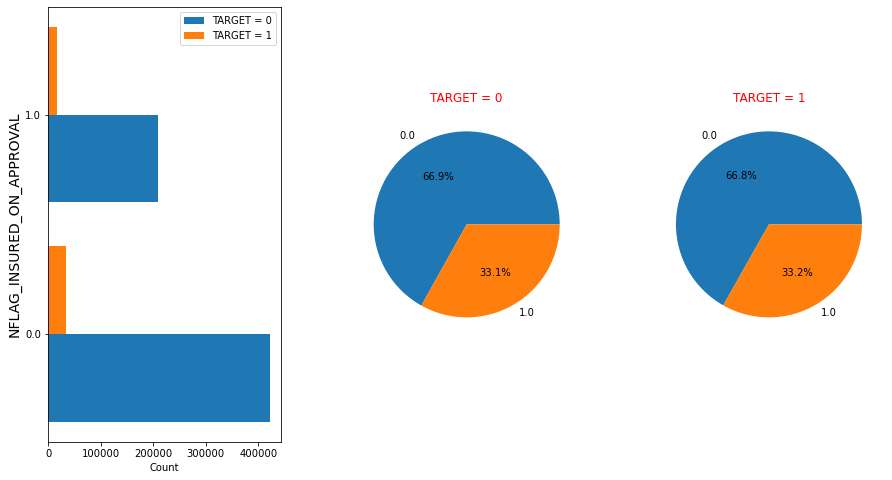

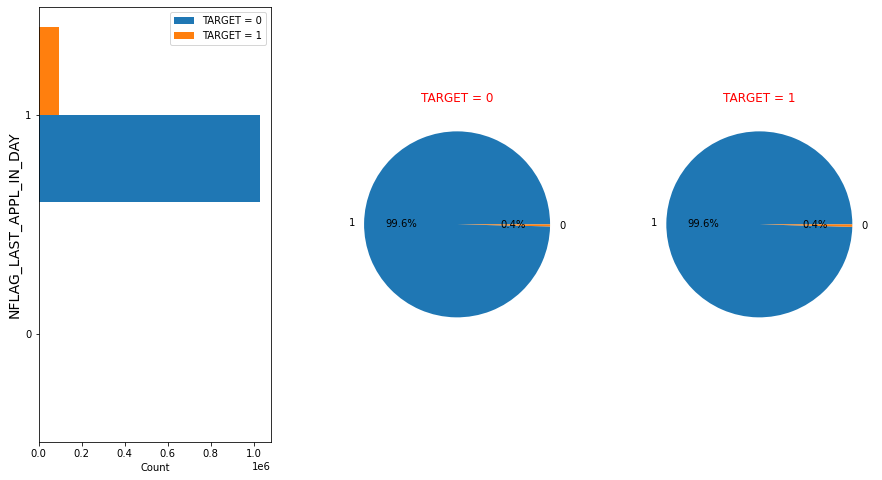

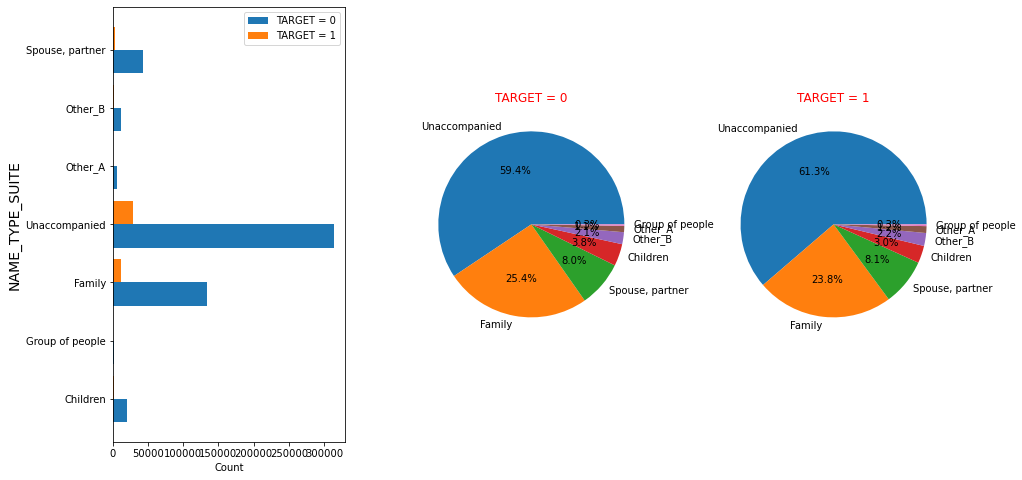

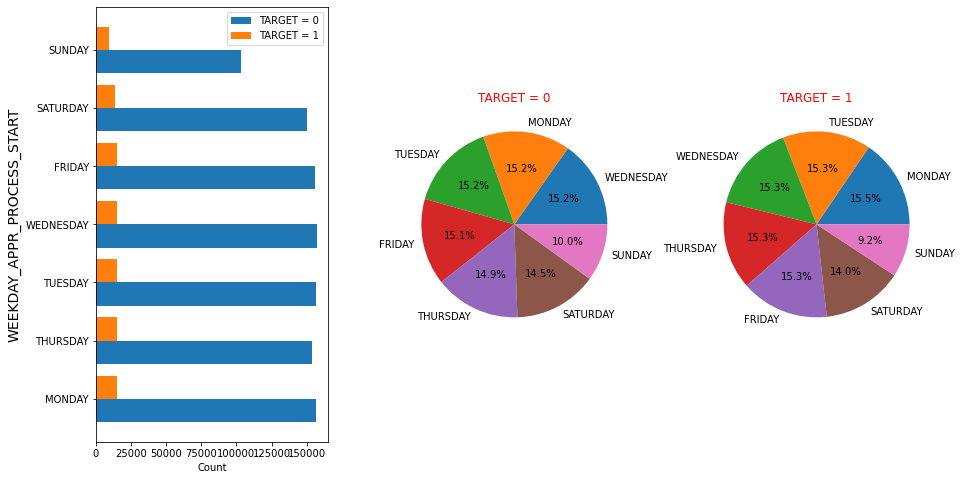

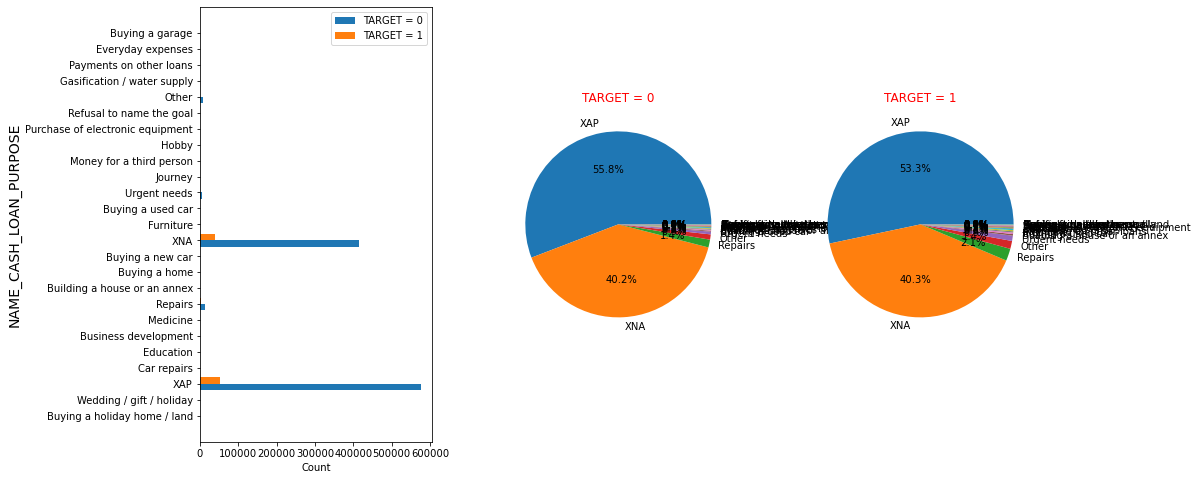

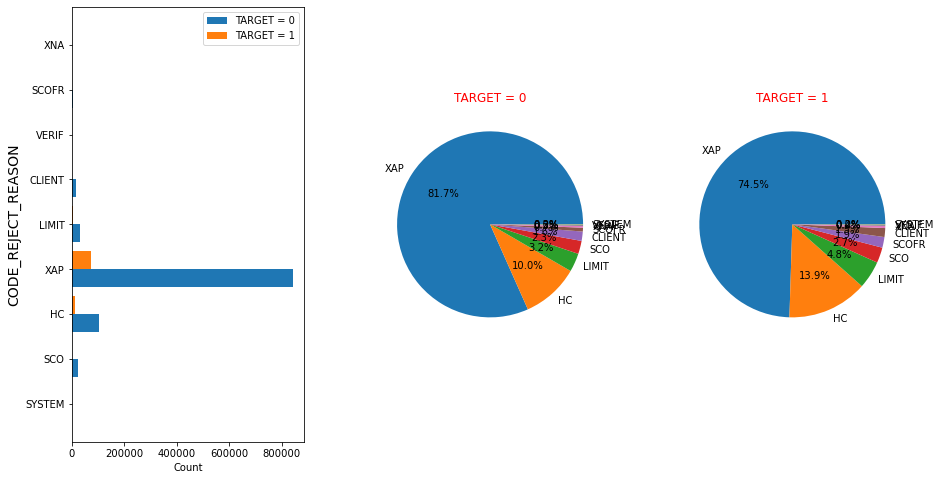

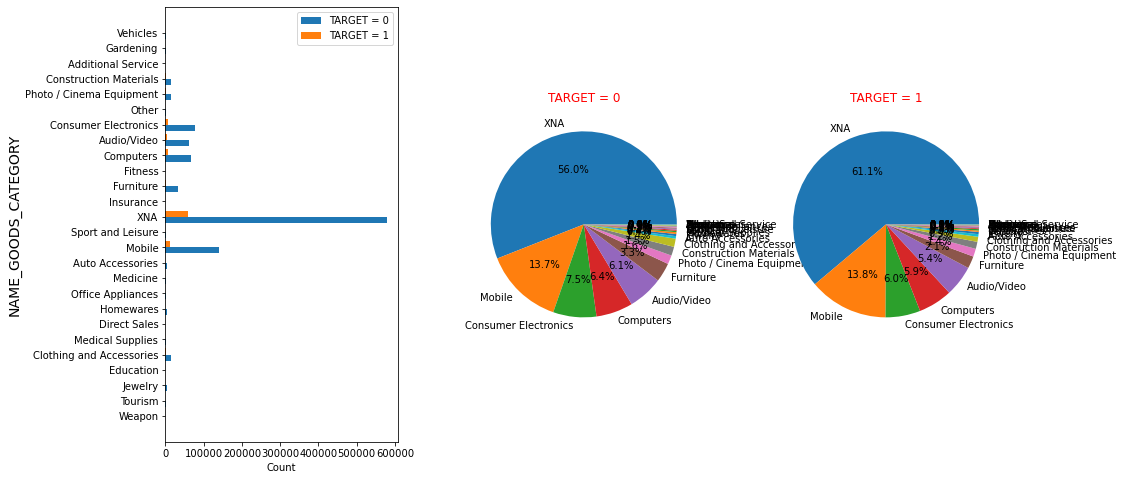

In [40]:
# WEEKDAY_APPR_PROCESS_START
for i in split.columns[:-1]:	
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 3)
    plt.subplots_adjust(wspace=0.3,hspace=0.4)
    ax1 = fig.add_subplot(gs[0, 0]) 
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])

    # ax1
    t_0 = split[split['TARGET'] == 0][i].value_counts()
    t_1 = split[split['TARGET'] == 1][i].value_counts()
    width = 0.4
    all_t = set(t_0.index) | set(t_1.index)
    index_mapping = {t: i for i, t in enumerate(all_t)}

    # Plot the unstacked bar chart
    x_0 = np.array([index_mapping[t] for t in t_0.index])
    x_1 = np.array([index_mapping[t] for t in t_1.index])

    ax1.barh(x_0 - width/2, t_0, height=width, label='TARGET = 0')
    ax1.barh(x_1 + width/2, t_1, height=width, label='TARGET = 1')
    ax1.tick_params(axis='y', rotation=0) 

    # Set y-axis ticks and labels
    ax1.set_yticks(np.arange(len(all_t)))
    ax1.set_yticklabels(all_t)

    # Set labels and title
    ax1.set_xlabel('Count')
    ax1.set_ylabel(f'{i}',size = 14)
    ax1.legend()

    # ax2, ax3
    sizes = split[split['TARGET'] == 0][i].value_counts(normalize=True)
    ax2.pie(sizes, autopct='%1.1f%%', labels=sizes.index, textprops=dict(color="black"))
    ax2.set_title('TARGET = 0', color='red')

    sizes = split[split['TARGET'] == 1][i].value_counts(normalize=True)
    ax3.pie(sizes, autopct='%1.1f%%', labels=sizes.index, textprops=dict(color="black"))
    ax3.set_title('TARGET = 1', color='red')



+ These features is not efficient with the target value -> Can be removed